# Waffle Chart

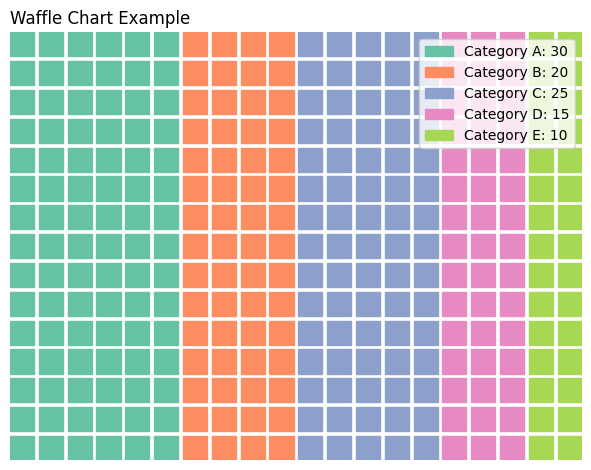

In [3]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

data = {'Category A': 30, 'Category B': 20, 'Category C': 25, 'Category D': 15, 'Category E': 10}

fig = plt.figure(FigureClass=Waffle, 
                 rows=15,
                 columns=20,
                 values=data,
                 title={'label': 'Waffle Chart Example', 'loc': 'left'},
                 labels=[f"{k}: {v}" for k, v in data.items()])

plt.show()

# Word Cloud

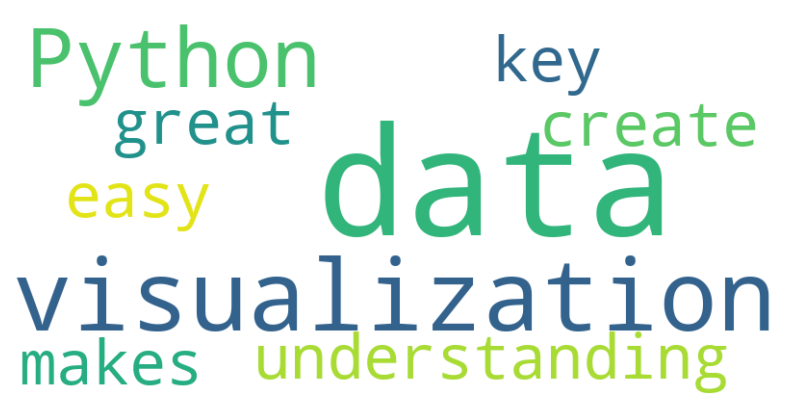

In [2]:
# Word cloud example
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = "Python is great for data visualization. Data visualization is key to understanding data. Python makes it easy to create visualizations."
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Seaborn

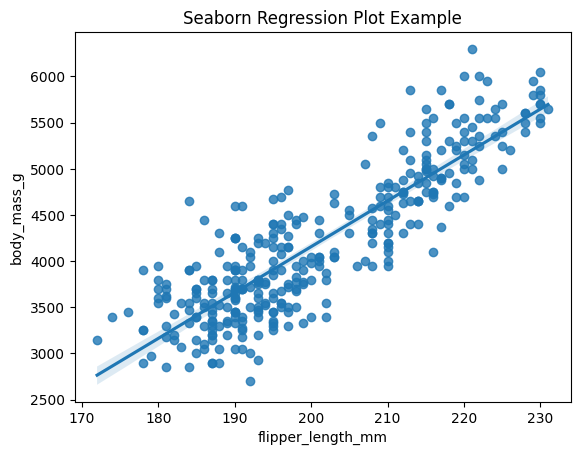

In [4]:
import seaborn as sns

sample_data = sns.load_dataset("penguins")
sns.regplot(x="flipper_length_mm", y="body_mass_g", data=sample_data)
plt.title("Seaborn Regression Plot Example")
plt.show()

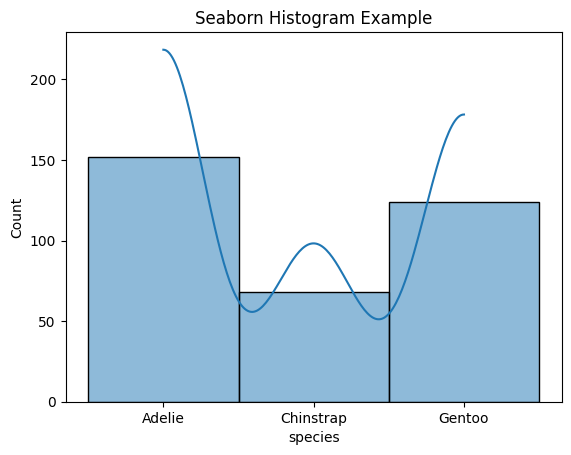

In [6]:
sns.histplot(data=sample_data, x="species", kde=True)
plt.title("Seaborn Histogram Example")
plt.show()

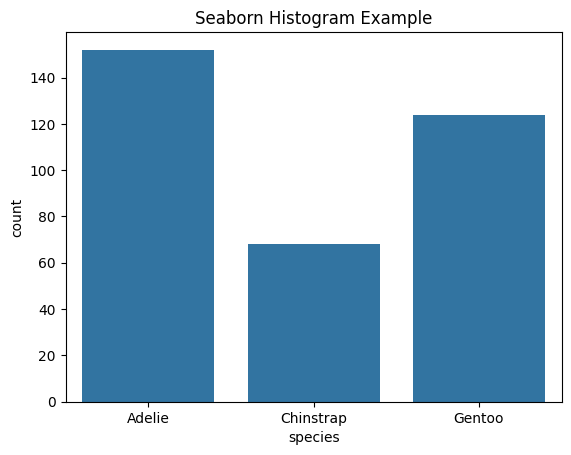

In [ ]:
sns.countplot(data=sample_data, x="species")
plt.title("Seaborn Count Plot Example")
plt.show()

# Folium

In [2]:
import folium

m = folium.Map()
m

In [ ]:
m = folium.Map(location=[45.5236, -122.6750], zoom_start=13)
m

In [12]:
attr = '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>'

tiles = 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png'

folium.Map(location=[45.5236, -122.6750], tiles=tiles, attr=attr, zoom_start=4)

In [13]:
canada_map = folium.Map(location=[56.130, -106.35],
                 zoom_start=4,
                 tiles='https://tileserver.memomaps.de/tilegen/{z}/{x}/{y}.png',
                 attr= 'Map <a href="https://memomaps.de/">memomaps.de</a> <a href="http://creativecommons.org/licenses/by-sa/2.0/">CC-BY-SA</a>, map data &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors'
)
canada_map

In [14]:
# Adding a marker
folium.Marker(location=[56.130, -106.35], popup='Canada').add_to(canada_map)
canada_map

In [15]:
# Adding multiple markers
cities = {
    "Toronto": [43.65107, -79.347015],
    "Vancouver": [49.282729, -123.120738],
    "Montreal": [45.501689, -73.567256]
}
for city, coords in cities.items():
    folium.Marker(location=coords, popup=city).add_to(canada_map)
canada_map

# PLotly

In [18]:
from plotly import express as px
from plotly import graph_objects as go
df = px.data.iris()
# print(df.head())
fig = go.Figure(data=go.Scatter(
    x=df['sepal_width'],
    y=df['sepal_length'],
    mode='markers',
    marker=dict(
        size=12,
        color=df['species_id'],  # set color to an array/list of desired values
        colorscale='Viridis',
        showscale=True
    )
))
fig.update_layout(title='Iris Sepal Dimensions',
                  xaxis_title='Sepal Width (cm)',
                  yaxis_title='Sepal Length (cm)')
fig.show()

In [19]:
px.scatter(df, x='sepal_width', y='sepal_length', color='species', title='Iris Sepal Dimensions with Plotly Express')

# Dash

In [ ]:
from dash import Dash, dcc, html
from plotly import express as px    
from plotly import graph_objects as go

data = px.data.iris()
app = Dash(__name__)

app.layout = html.Div(children=[
    html.H1(children='Iris Data Visualization with Dash'),
    dcc.Graph(
        id='iris-scatter',
        figure=px.scatter(data, x='sepal_width', y='sepal_length', color='species', title='Iris Sepal Dimensions')
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)